In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#get a data
data = 'car_price_prediction.csv'
car_df = pd.read_csv(data)

In [4]:
#view a data
print(car_df.head())
print(car_df.describe())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [11]:
# Data Preprocessing
car_df['Mileage'] = car_df['Mileage'].astype(str)  # Ensure Mileage is treated as string
car_df['Mileage'] = car_df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Extract numeric part of 'Engine volume' and convert to float
car_df['Engine volume'] = car_df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [12]:
# Select relevant features
X = car_df[['Prod. year', 'Engine volume', 'Mileage']]
y = car_df['Price']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Transform Features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [14]:
# Train the Model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make Predictions
y_pred = model.predict(X_poly_test)

Mean Squared Error: 295258820.05982685
R-squared: 0.0524325164411914


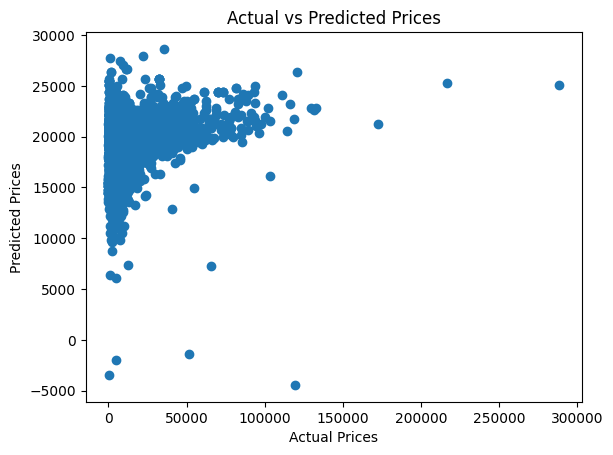

In [15]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()